In [5]:
import os
import numpy as np
import pandas as pd

# to later draw the graph
import matplotlib.pyplot as plt

# Machine learning algorithms
from sklearn.neural_network import MLPRegressor #Neural network

# Cross-validation
'''
GridSearchCV = Perform an optimization of the parameters. 可以保证在指定的参数范围内找到精度最高的参数
                1. search for the best parameters for model; 
                2. automatically fit a new model on the training dataset w/ the parameters that 
                    can yield the best cross-validation performance.
cross_val_score = to implement cross-validation in scikit-learn.
PS: When an integer is passed to the cv parameter of cross_val_score():
        cv=int (same as cv=StratifiedKFold(n_splits=int)) is used if the estimator is a classifier 
        and y is either binary or multiclass; In all other cases, KFold is used.
        i.e. 写int=10会自动转换为KFold(n_splits=10),不会转换为StratifiedKFold(n_splits=10)。
'''
from sklearn.model_selection import GridSearchCV, cross_val_score

path = os.getcwd()#get current path
path_up1Dir = os.path.dirname(path)#go up one directory
dataset = pd.read_excel(path_up1Dir +'/x_TotalArea_y_MVPA/x_TotalArea_y_MVPA.xlsx')#to import the preprocessed dataset into a variable

# print(dataset)

In [2]:
X = dataset['X']
y = dataset['Y']
other = pd.DataFrame(dataset.iloc[:,:4])
# print(X, y, other)

In [3]:
X_ = X.values.reshape(-1, 1) # some algorithms need to reshape X if X has a single feature

In [20]:
# Neural Network
'''
Both MLPRegressor and MLPClassifier use parameter alpha for regularization (L2 regularization) term 
    which helps in avoiding overfitting by penalizing weights with large magnitudes.
Finding a reasonable regularization parameter is best done using GridSearchCV, usually in the range 10.0 ** -np.arange(1, 7).
# alpha = L2 penalty (regularization term) parameter.
'''
alpha = 10.0 ** -np.arange(1, 7)

# Set param_grid, aka the main parameters in RandomForestRegressor
param_grid_MLPRegressor = {
    'alpha':alpha
}

# GridSearchCV
mlpr = GridSearchCV(estimator=MLPRegressor(), # algorithm - Random Forest Regressor
                    param_grid=param_grid_MLPRegressor, # specify the parameters to search over using a dict or list of dictionaries
                    cv=10 # 10-Fold
                    )

# Build the model, aka training the dataset
mlpr.fit(X_, y)

# Output the best parameter, cross-validation score, estimator, and the index of best estimator.
print("\n------------------ MLPRegressor Model")
print("Best parameter: {}".format(mlpr.best_params_))
print("Best cross-validation score: {:.2f}".format(mlpr.best_score_))
print("Average score in 10-Fold: \n", mlpr.cv_results_['mean_test_score'])
print("Std score in 10-Fold: \n", mlpr.cv_results_['std_test_score'])
print("Best estimator: {}".format(mlpr.best_estimator_))
print("The Index of Best estimator: {}".format(mlpr.best_index_))


------------------ MLPRegressor Model
Best parameter: {'alpha': 0.0001}
Best cross-validation score: -0.19
Average score in 10-Fold: 
 [-0.19168567 -0.19242123 -0.19828358 -0.18844595 -0.19737971 -0.19313934]
Std score in 10-Fold: 
 [0.2583621  0.26149932 0.26166821 0.25504141 0.26253617 0.26239386]
Best estimator: MLPRegressor()
The Index of Best estimator: 3


In [21]:
'''
机器学习不同于统计建模，有些定义不一样。sklearn这个包定义的比较奇怪而已。
https://zhuanlan.zhihu.com/p/369330147，score接近于1越好的是R2这个指标，其他的指标是接近于0越好。把负数去掉即可。
'''
# 10-Fold Cross-validation to check its accuracy again
score = cross_val_score(estimator=MLPRegressor(alpha=0.0001),
                        X=X_, y=y,
                        cv=10
                       )
print(score)

[-0.02920238 -0.8707787  -0.27727428 -0.2434753  -0.3701785  -0.07065715
 -0.03537289 -0.00474207  0.00388567 -0.02421755]


In [22]:
# Use the above optimal parameters to build new model, aka training the dataset
mlpr = MLPRegressor(alpha=0.0001).fit(X_, y)

ValueError: x and y must have same first dimension, but have shapes (644,) and (1,)

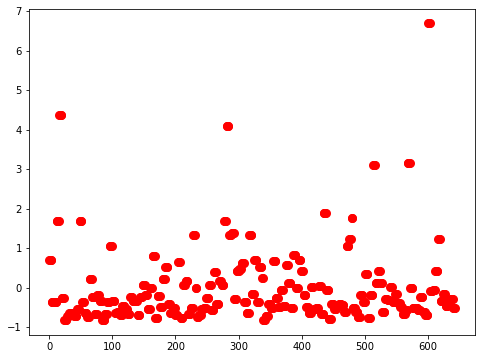

In [14]:
# Draw the Neutral Network
'''
xx=range(0,len(y))
plt.figure(figsize=(8,6))
plt.scatter(xx, y, color="red", label="Sample Point", linewidth=3) 
plt.plot(xx, mlpr, color="orange", label="Fitting Line", linewidth=2)
plt.legend()
plt.show()
'''